In [1]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import tools
import pandas as pd
import sys

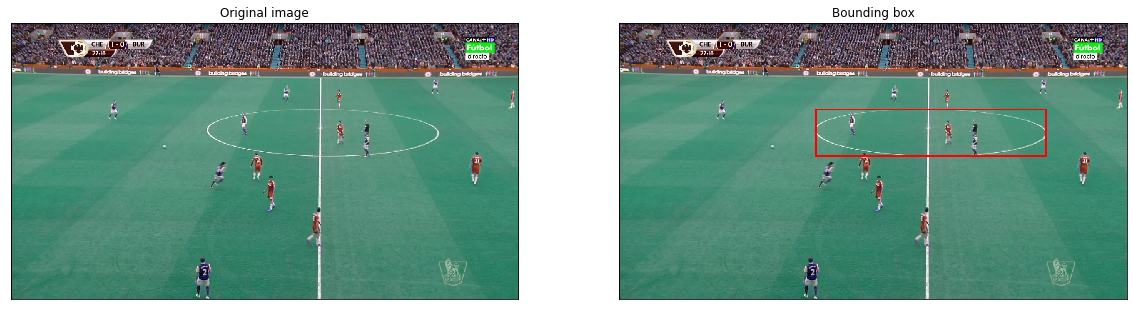

In [2]:
##Paths of image and corresponding annotation:
image_path = '../images/elps_soccer_2.png'
annotation_path = '../annotations/elps_soccer_2.txt'

##Import image and characteristics:
original_img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
height = img.shape[0]
width = img.shape[1]


##Import the coordinates of all points of the ellipse and process them:
data = pd.read_csv(annotation_path, header=None)
nb_coord = data.shape[1]
coord_list = []

for i in range(nb_coord):
    coord_list.append(data[i][0])

coord_list = coord_list[: -2]
coord_array = np.asarray(coord_list)
points = coord_array.reshape([-1, 2])

##Cast coordinates to int type (will be used as coordinates):
pts = points.astype(int)

##Conversion from Cytomine coordinates system to opencv coordinates system:
for i in range(len(pts)):
    pts[i][1] = height - pts[i][1]
    
    
##Output of boundingRect = (x_min, y_min, length of box, width of box):
rect = cv2.boundingRect(pts)

##Get extreme values of coordinates:
x_min = rect[0]
y_min = rect[1]
x_max = rect[0] + rect[2] - 1
y_max = rect[1] + rect[3] - 1

##Red color:
color = (255, 0, 0)

##Draw bonuding box on image (using 2 opposite corners of the rectangle):
cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 3)


tools.multiPlot( 1, 2, (original_img, img),
                ( 'Original image', 'Bounding box'),
                cmap_tuple=( cm.gray, cm.gray))
#cv2.imwrite('img.png', img)